In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)
plt.rcParams['animation.writer'] = 'avconv'
%load_ext tikzmagic

import scipy.integrate

from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact, Layout

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# Convolution Examples and the Convolution Integral

The code in this recap has been taken from http://dspillustrations.com/pages/posts/misc/convolution-examples-and-the-convolution-integral.html with permission of the author. The code cannot be reused without explicit permission of the original author. 
In this notebook, we will recap convolution by calculating some convolutions numerically. Formally, the convolution $(f_1*f_2)(t)$ of two signals $f_1(t)$ and $f_2(t)$ is defined by the convolution integral

$$
(f_1*f_2)(t) = \int_{-\infty}^{\infty}f_1(\tau)f_2(t-\tau)d\tau.
$$

So, the convolution of two function is the integral over the product of both functions, where one function is time-shifted and flipped in time. Let us not think about why this operation makes sense for now. Instead, let's define two functions $f_1(t)$ and $f_2(t)$:

In [11]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

Let's plot these two functions to see how they look like:

In [12]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

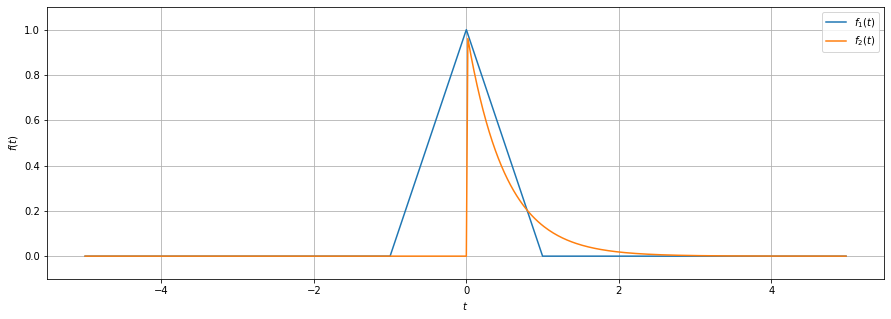

In [13]:
plt.figure(figsize=(15,5))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

So, we see one function is a triangle, the other is the exponential impulse. Let us now evaluate the convolution integral at a given time $t_0=1$:

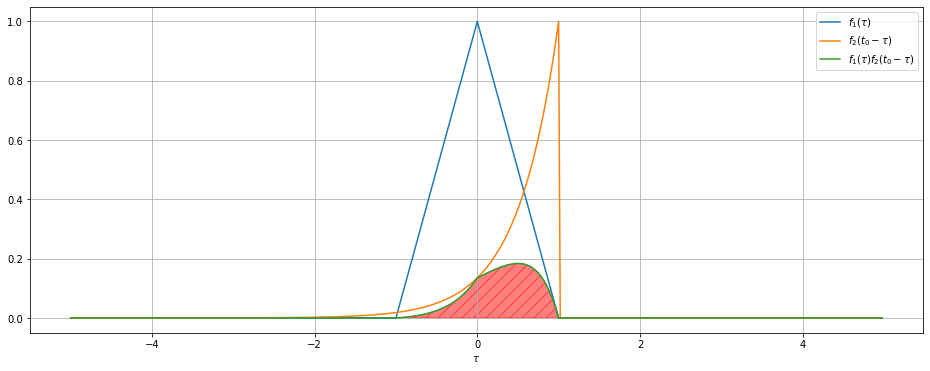

In [14]:
t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(16,6))
plt.gca().set_ymargin(0.05);
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')
plt.fill(t, product(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$'); plt.legend(fontsize=10);

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): $(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

As we see, the green curve $f_2(t_0-\tau)$ was shifted by $t_0$ to the right, and then horizontally mirrored. The value of the convolution integral corresponds to the red shaded area, which is the product of both curves. 

We can now write a small function which illustrates the convolution integral for different time-shifts.

In [15]:
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear()
    
    plt.subplot(211)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(fontsize=10)
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white'))
    
    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$')
    plt.legend(fontsize=10)
    plt.show()

In [16]:
plt.figure(figsize = (16,9))
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

<Figure size 1152x648 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

The animation shows, how the green function is gradually shifted to the right, producing more and more overlap between both curves and hence increasing the area under their product. Then, when the green curve is shifted even more to the right, we see that the area under their product decreases again. 

Another important property can be seen from the convolution output: Even though the green input signal has a sharp jump at $t=0$, the convolution of both functions is a smooth function. In particular, this property is due to the integral in the convolution calculation: The integral somehow creates a moving average filter, which cannot create immediate jumps in the output signal (as long as the input does not contain Dirac-impulses). So, a general property of the convolution, is the fact that the convolution product of two functions is always a smoother curve than the input signals.

Let us now look at the classical example for convolution explanation: The convolution of a rectangular function with itself. Here, the result is a triangle with a maximum, when both rectangles perfectly overlap:

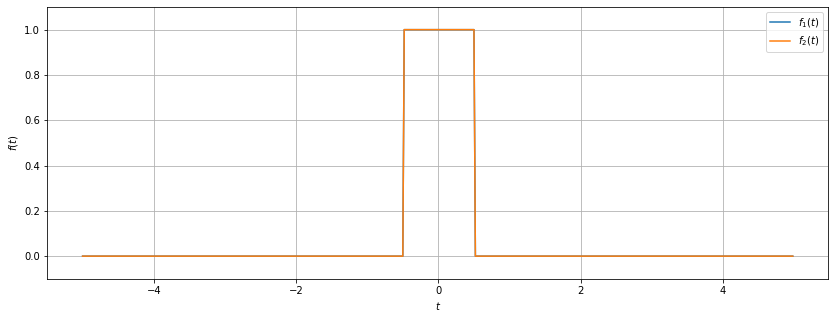

In [17]:
f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: (abs(t)<0.5).astype(float)
plt.figure(figsize=(14,5))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [18]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

In this case we specifically can check where and how the integration boundaries are important. If you set the slider to $t_0 = -1$ you will see that the two pulses are just so touching. If $t_0 < -1$ the integral will be zero, as the two functions are not overlapping. If $t_0>1$ the same. In between, you find that the integration will start at $\tau = -0.5$ and go up to $\tau = t$.  

Let us finally look at the convolution of an exponentially decaying impulse with a switched-on sine wave. If we understand the blue graph as the impulse response of some LTI system and the green curve as its input signal, then the convolution of both is the output of the signal to this particular input. 

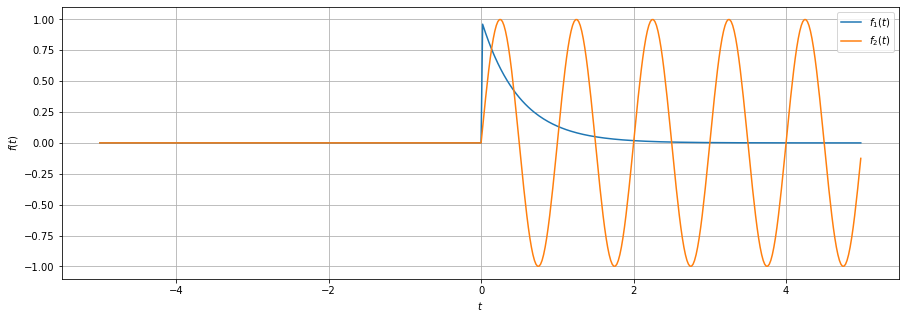

In [19]:
f1 = lambda t: (t>0) * np.exp(-2*t)
f2 = lambda t: np.sin(2*np.pi*t) * (t>0)
plt.figure(figsize=(15,5))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-1.1, 1.1));

We see that the impulse response (blue) is causal, i.e. $f_1(t)=0, t<0$. Since the sine-wave is switched on at $t=0$, the output of the system is zero before switching on the signal. Then, after some transient phase, the output of the system becomes a sine-wave with the same frequency but with a different phase and amplitude. This is the fundamental property of LTI systems: The response of an LTI system to a harmonic is a harmonic of the same frequency, but (possibly) with different phase and amplitude. We also say, harmonics are eigenfunctions of the LTI system. Hence, in particular harmonics are eigenfunctions of the convolution integral.

In [21]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

## Conclusion
> - The convolution operation is given by the integral over the product of two functions, where one function is flipped and shifted in time.
> - The convolution operation smoothes the input signals, i.e. the output of the convolution is a more smooth function that its input functions.
> - Harmonic functions (i.e. sine, cosine) are the eigenfunctions of the convolution operation.  This means convolving a sine with some function yields in a sine of different amplitude and phase, but same frequency.

As a specific Example, together with the choice of integration boundaries, we want to look at the case of $y(t) = \int \limits_{- \infty}^{\infty} \! rect(\frac{\tau}{T_0}-\frac{T_0}{2}) \cdot \frac{1}{T} \epsilon (t- \tau) e^{-\frac{t-\tau}{T}} \, dx$

Which is the mirrored and shifted impulse response at the rear and a rectangular input in the front. To solve the convolution we will need to split the integral. So first we will consider the integrand:


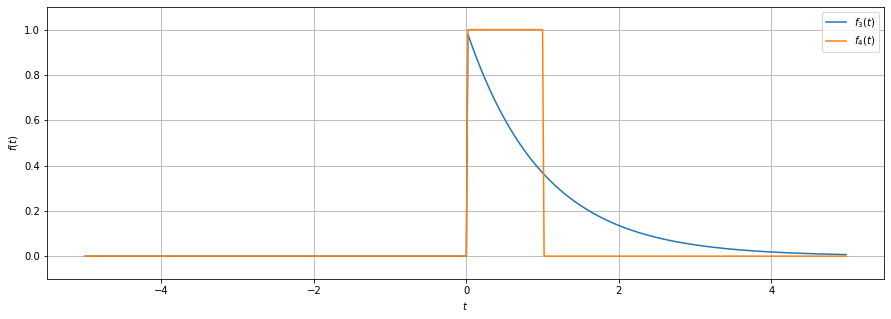

In [22]:
T = 1
T0 = 1
f3 = lambda t: (1/T)*(t>0) * np.exp(-t/T)
f4 = lambda t: (abs(t/T0 - T0/2)<0.5).astype(float)
plt.figure(figsize=(15,5))
plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

Now we have several cases to be distinguished. Note that the integral is in terms of $\tau$ but t is still in as a variable! The convolution is done with the Square Impulse and a flipped and shifted version of the Impulse response. For this we will now create a shifted and mirrored version of the impulse response. We will shift by t0

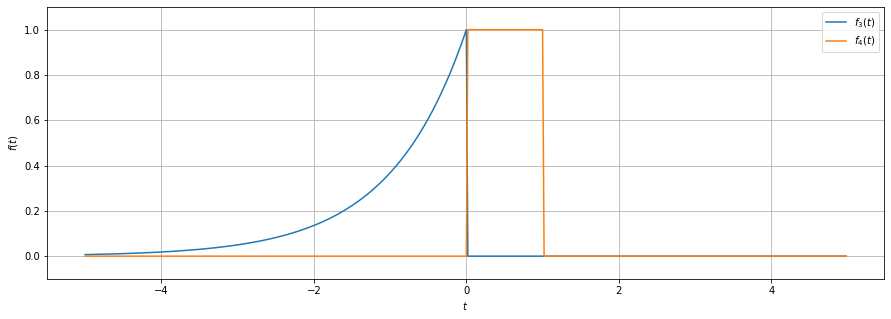

In [23]:
T = 1
T0 = 1
t0 = 0

f3 = lambda t: (1/T)*((t-t0)<0) * np.exp(-(t0-t)/T)
f4 = lambda t: (abs(t/T0 - T0/2)<0.5).astype(float)
plt.figure(figsize=(15,5))
plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

When we change t0 (what is t in the real convolution, we will now shift the impulse response. For $t0<0$ like this: 

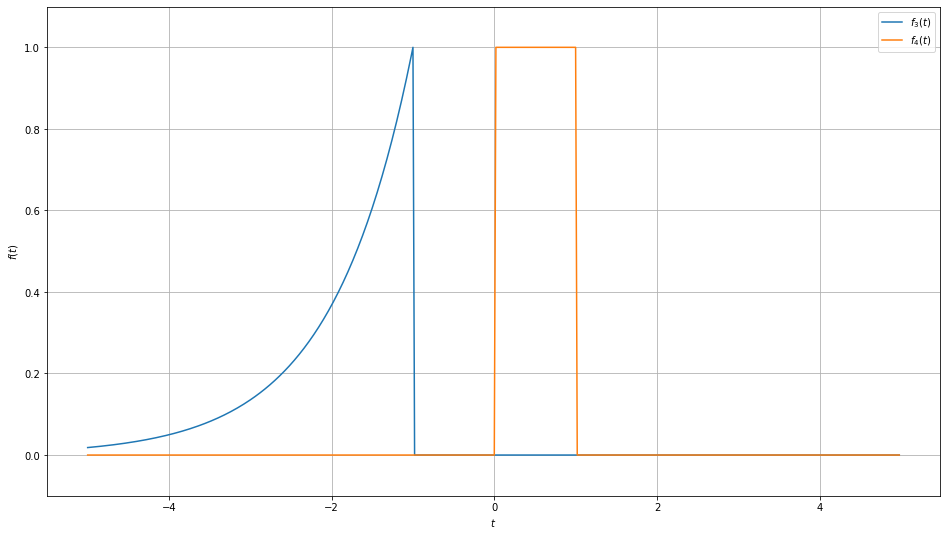

In [24]:
t0 = -1

plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

So when we integrate over $\tau$ now, we will not get anything, as one of the two factors under the integral will always be zero. When we shift to the other side, $t0 > 0$

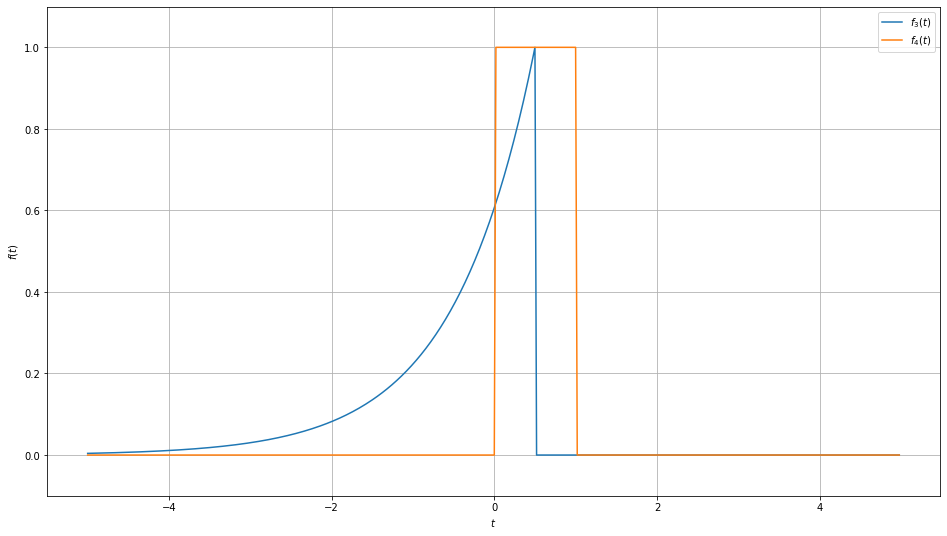

In [25]:
t0 = 0.5

plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

Here it will now depend on how much exactly we shift. If we shift by less than T0, then the amount of the square pulse that we have in the integral will change. Above we have T0/2, below exactly T0 and then 2*T0.

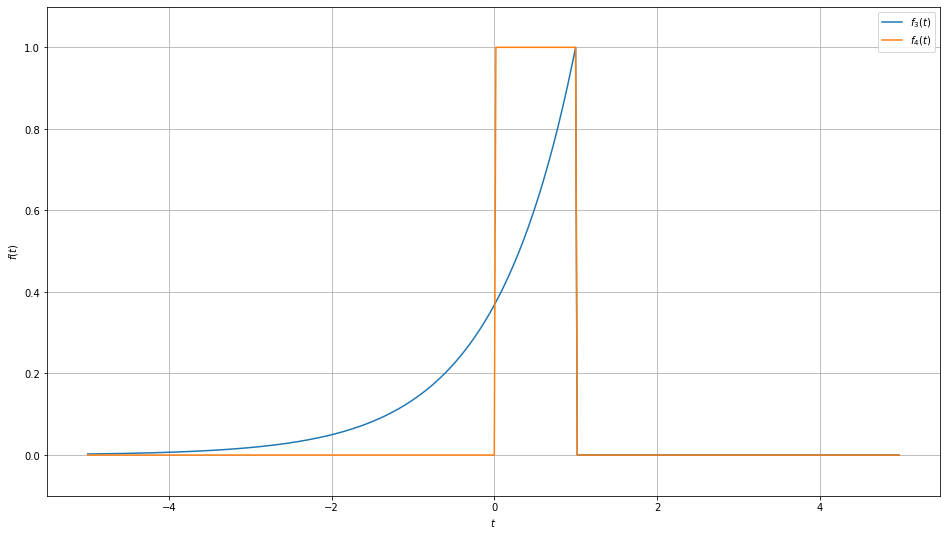

In [26]:
t0 = 1

plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

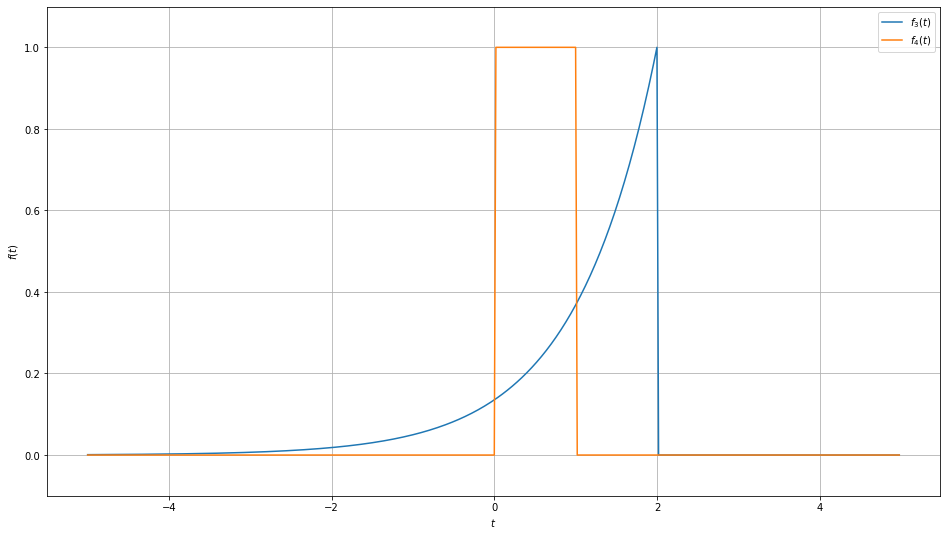

In [27]:
t0 = 2

plt.plot(t, f3(t), label='$f_3(t)$')
plt.plot(t, f4(t), label='$f_4(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

However, in all cases there is no intgral above t0, as the shifted impulse function is always zero there. So we can integrate up to t when t is less than t0 and simply up to t0 when it is larger. 

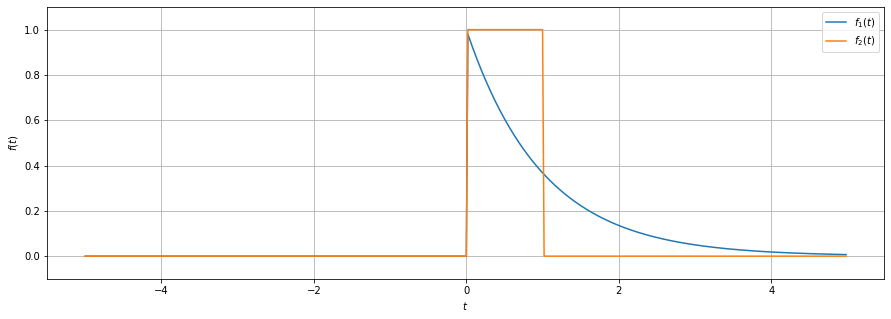

In [28]:
T = 1
T0 = 1
f1 = lambda t: (1/T)*(t>0) * np.exp(-t/T)
f2 = lambda t: (abs(t/T0 - T0/2)<0.5).astype(float)
plt.figure(figsize=(15,5))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

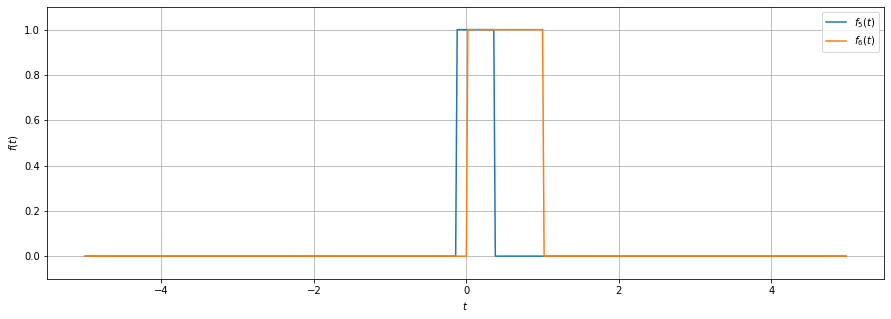

In [29]:
T1 = 1
T0 = 0.5
f5 = lambda t: (abs(t/T0 - T0/2)<0.5).astype(float)
f6 = lambda t: (abs(t/T1 - T1/2)<0.5).astype(float)
plt.figure(figsize=(15,5))
plt.plot(t, f5(t), label='$f_5(t)$')
plt.plot(t, f6(t), label='$f_6(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [30]:
interact(lambda t0: showConvolution(f5, f6, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

As a further Example we consider the following: 

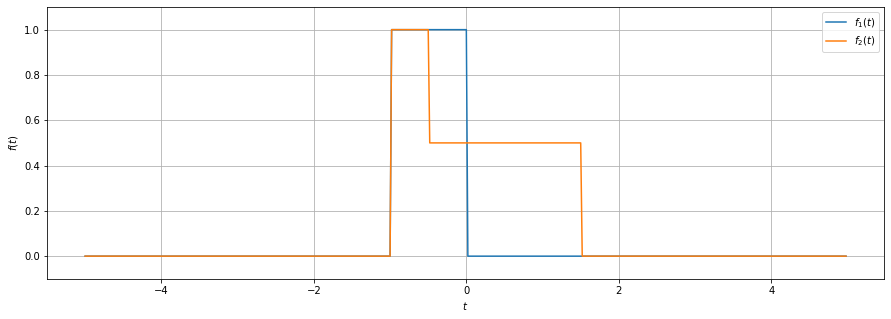

In [31]:
T = 1
T0 = 1
T1 = 0.5
T2 = 2
f1 = lambda t: (abs(t/T0 + T0/2)<0.5).astype(float)
f2 = lambda t: (abs(t/T1 + 1.5)<0.5).astype(float)+0.5*(abs(t/T2 -0.25)<0.5).astype(float)

plt.figure(figsize=(15,5))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=10); plt.ylim((-0.1, 1.1));

In [32]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.05), Output()), _dom_…

In order to have an easier task to find the exact areas where the integration yields a contribution in such a more complicated case, it is helpful to make up a table to find out when we have a constant area of integration that does not need $t_0$ in the boundaries and when we do have to have it, and then from where to where. So we put up a table, that marks where the integration takes place in $\tau$ coordinates and what that means in terms of $t_0$. We split the function into its two component parts, the narrow and high rectangle (R1) and the wider and lower rectangle (R2). These do not always both contribute. We can also see that the integration always yields results only in the area where the fixed rectangle sits, i.e. in the intervall $[-1;0]$. Consequently we need to project the values of $t_0$ always so that the integration boundaries run from $[-1;0]$. That means that if we look at the case of $t_0 in [-2;-1.5]$ we find that the lower boundary is fixed at $-1$, as this is the lower end of the fixed rectangle, and the upper bound needs to start at $-1$ and increase from there. So we take $t_0 = -2$ and the intervall border needs to be $-1$ so the boundary is $t_0+1$, then for $t_0 = -2$, the boundary is $-2+1 = -1$. 

| Parts Contributing |  $t_0 > $ than | $t_0 < $ than | Intervall of Integration (in $[-1;0]$)| Smallest Integration Intervall |Largest Integration Intervall |
| --- | --- | --- |  --- | --- | --- |
| None | $-\infty$ | $-2$ | - | - | - -> = 0 | 
| R1 | $-2$ | $-1.5$ | $[-1; t_0 +1]$ | $[-1;1]$ | $[-1;-0.5]$ | 
| R1 & R2 -> R1|$-1.5$ | $-1$ | $[t+0.5; t_0]$ | $[-1;-0.5]$ | $[-0.5;0] -> Constant$ | 
| R1 & R2 -> R2|$-1.5$ | $-1$ | $[-1; t_0+0.5]$ | $[-1;--1]$ | $[-1;-0.5]$ | 
| R1 &R2 -> R1 | $-1$ | $-0.5$ | $[t_0+0.5; 0]$ | $[0;0]$ | $[-0.5;0]$ | 
| R1 &R2 -> R2 | $-1$ | $-0.5$ | $[-1; t_0 +0.5]$ | $[-1;-0.5]$ | $[-1;0]$ |
| R2  | $-0.5$ | $0.5$ | $[-1; 0]$ | $[-1;0]$ | $[-1;0]$ -> Constant |
| R2  | $0.5$ | $1.5$ | $[t_0-1.5; 0]$ | $[0;0]$ | $[-1;0]$ -> Constant |
| None | $1.5$ | $-\infty$ | - | - | - -> = 0 | 